In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
def generate_image(image_size, seed=42):
    input_image = np.random.randn(image_size[1], image_size[0])
    scale = np.max([np.max(input_image), -1 * np.min(input_image)])
    input_image = 255 / (2 * scale) * input_image + 0.5 * 255
    
    return input_image

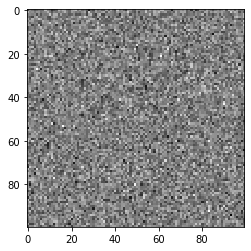

In [3]:
image_size = (100, 100)
input_image = generate_image(image_size)

fig, ax = plt.subplots()
im = ax.imshow(input_image, cmap='gray', vmin=0, vmax=255)

In [4]:
class RGBFilter(nn.Module):
    def __init__(self):
        super(RGBFilter, self).__init__()
        self.rgb = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1, bias=False)
        self.rgb.requires_grad_(False)
        self.rgb.weight.fill_(1.0)
        
    
    def forward(self, x):
        return self.rgb(x)
        
rgb_filter = RGBFilter()
print(rgb_filter)

RGBFilter(
  (rgb): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1), bias=False)
)


In [5]:
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.clip(0, 255)
    
    return image

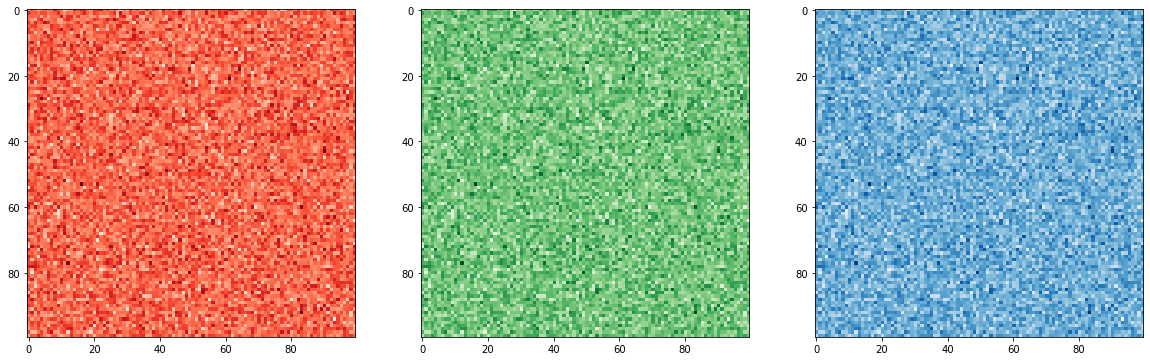

In [6]:
input_torch = (torch.from_numpy(input_image).view(1, 1, input_image.shape[0], input_image.shape[1])).float()
output = rgb_filter(input_torch)

output_numpy = im_convert(output)

colors = ('Reds', 'Greens', 'Blues')
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, axis in enumerate(axes):
    axis.imshow(output_numpy[i, :, :], cmap=colors[i], vmin=0, vmax=255)

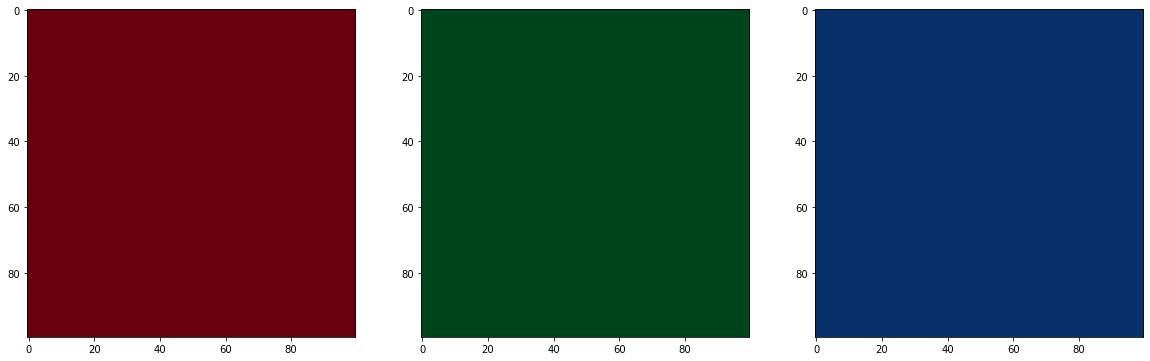

In [7]:
target_images_rgb = 255 * np.ones((3, image_size[0], image_size[1]))

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, axis in enumerate(axes):
    axis.imshow(target_images_rgb[i, :, :], cmap=colors[i], vmin=0, vmax=255)

Loss:  10625.0673828125


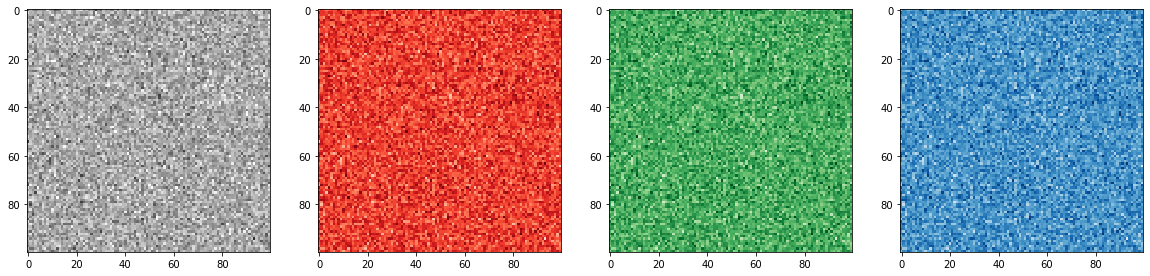

Loss:  4537.443359375


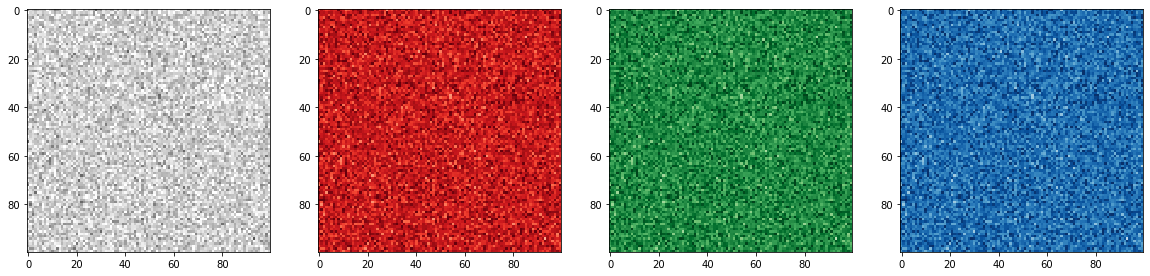

Loss:  1449.5732421875


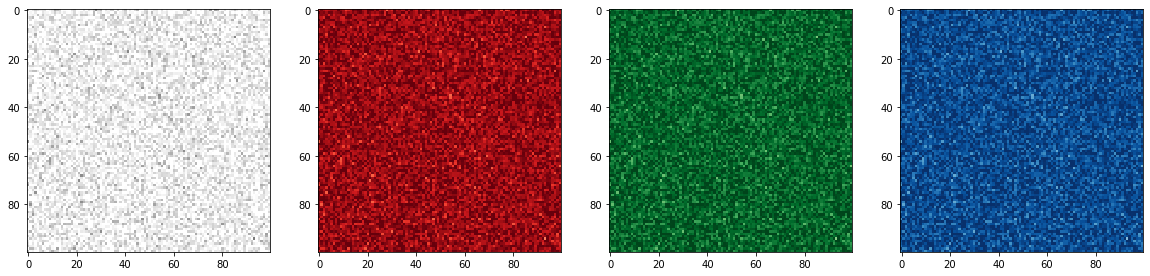

Loss:  446.95867919921875


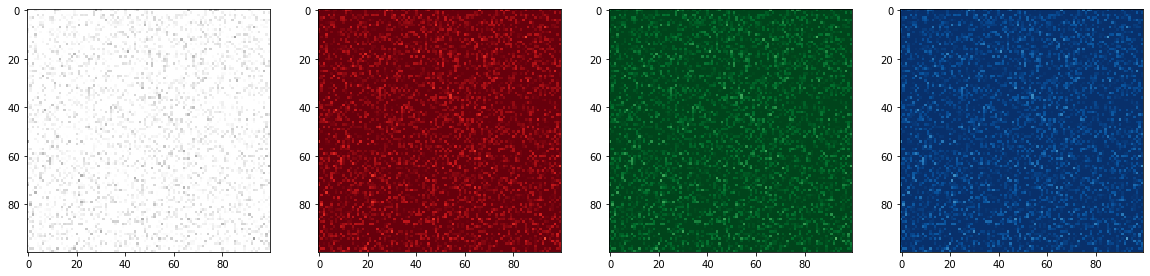

Loss:  403.61700439453125


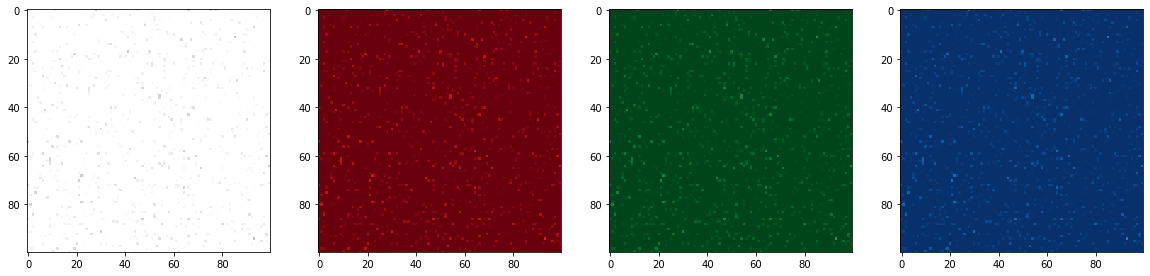

Loss:  515.6613159179688


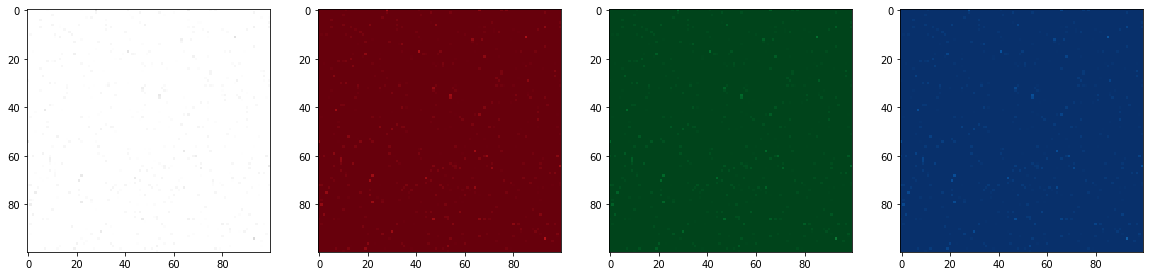

In [9]:
target_torch = torch.from_numpy(target_images_rgb).unsqueeze(0).float()
input_torch = torch.Tensor(input_image).view(1, 1, input_image.shape[0], input_image.shape[1]).clone()
input_torch.requires_grad_(True)

criterion = nn.MSELoss()
optimizer = optim.Adam([input_torch], lr=10)

steps = 25
show_every = 4
for ii in range(1, steps+1):
    optimizer.zero_grad()
    
    output = rgb_filter(input_torch)
    loss = criterion(target_torch, output)
    
    loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  ii % show_every == 0:
        print('Loss: ', loss.item())
        fig, axes = plt.subplots(1, 4, figsize=(20, 10))
        axes[0].imshow(im_convert(input_torch).squeeze(), cmap='gray', vmin=0, vmax=255)
        output_numpy = im_convert(output)
        for i in range(0, 3):
            axes[i + 1].imshow(output_numpy[i, :, :], cmap=colors[i], vmin=0, vmax=255)
        plt.show()